In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opyn Transaction and Vault Analysis

In [2]:
txdf0 = pd.read_csv('oToken-Transactions.csv', dtype = {'value': float})
#txdf = pd.read_csv('oToken-Transactions.csv')

In [3]:
txdf0.columns

Index(['tx', 'minute', 'value', 'account', 'side', 'type', 'token'], dtype='object')

In [4]:
txdf0.head()

,tx,minute,value,account,side,type,token
0,014843ca795d44e17309a5c70bdfa28973d073883fbc4a...,02/10/20 20:01,0.00,5778f2824a114f6115dc74d432685d3336216017,buy,put,ocDAI
1,8f78cda0640a05c6ce42edd6c70fa4fb7a085f1f79d0f2...,02/11/20 22:30,0.00,1460771b713e8e58e350f9d82f7b83acb6b2e75f,buy,put,ocDAI
2,ee22249d3296f2a6241cecdfcabe7776e4072d3771c2da...,02/12/20 1:59,0.02,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,put,ocUSDC
3,5e2f03277e21e4d8e53ec2e85d808f2f4c699a3dcf43be...,02/12/20 2:58,1.59,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,put,ocDAI
4,1f0c4191949617e32a42b358b0d65adf08ac4a82b117b9...,02/12/20 6:25,16.31,5b0d9e4099bf629387a842ed6bff4dab70573f31,buy,put,ocDAI


In [5]:
txdf = txdf0[txdf0.account != '076c95c6cd2eb823acc6347fdf5b3dd9b83511e4'].drop(columns = ['tx', 'minute', 'type'])

In [6]:
txdf.head()

,value,account,side,token
0,0.00,5778f2824a114f6115dc74d432685d3336216017,buy,ocDAI
1,0.00,1460771b713e8e58e350f9d82f7b83acb6b2e75f,buy,ocDAI
2,0.02,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,ocUSDC
3,1.59,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,ocDAI
4,16.31,5b0d9e4099bf629387a842ed6bff4dab70573f31,buy,ocDAI


In [7]:
%matplotlib inline

In [8]:
ocDAI = txdf[txdf.token == 'ocDAI'].value
ocUSDC = txdf[txdf.token == 'ocUSDC'].value
oETH = txdf[txdf.token.str.match(r'^oETH')].value
oCRV = txdf[txdf.token == 'oCRV'].value

buydf = txdf[txdf.side == 'buy']

ocDAI_buy = buydf[buydf.token == 'ocDAI'].value
ocUSDC_buy = buydf[buydf.token == 'ocUSDC'].value
oETH_buy = buydf[buydf.token.str.match(r'^oETH')].value
oCRV_buy = buydf[buydf.token == 'oCRV'].value

selldf = txdf[txdf.side == 'sell']

ocDAI_sell = selldf[selldf.token == 'ocDAI'].value
ocUSDC_sell = selldf[selldf.token == 'ocUSDC'].value
oETH_sell = selldf[selldf.token.str.match(r'^oETH')].value
oCRV_sell = selldf[selldf.token == 'oCRV'].value

In [9]:
oETH_sell.median(), oETH_sell.mean(), oETH_buy.median(), oETH_buy.mean()

(1967.2, 5982.981784548422, 1870.23, 5351.160890052356)

''

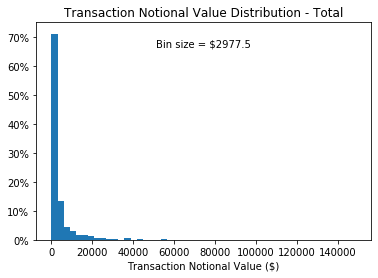

In [10]:
import matplotlib.ticker as mtick

hist, bins, _ = plt.hist(txdf.value, bins=50, density = False, weights=np.ones(len(txdf.value)) / len(txdf.value))
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylim(0,.75)
plt.title('Transaction Notional Value Distribution - Total')
plt.xlabel('Transaction Notional Value ($)')
plt.text(.5, .9, 'Bin size = ${}'.format(round(bins[1], 2)), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
; 

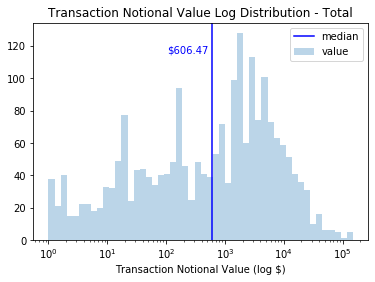

In [11]:
kwargs = dict(histtype='bar', alpha=.3, bins=np.logspace(np.log10(bins[0]+1),np.log10(bins[-1]),len(bins)))
plt.axvline(txdf.value.median(), label = 'median', color = 'blue')
plt.hist(txdf.value, **kwargs, label = 'value')
plt.text(.4, .9, '$'+str(round(txdf.value.median(),2)), horizontalalignment='center', 
         verticalalignment='center', transform=ax.transAxes, color = 'blue')
plt.xscale('log')
plt.legend()
plt.title('Transaction Notional Value Log Distribution - Total')
plt.xlabel('Transaction Notional Value (log $)');

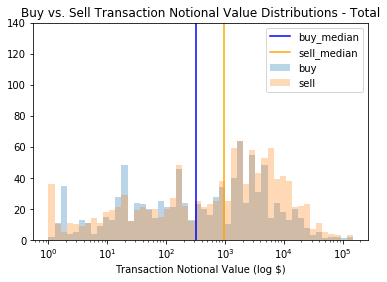

In [12]:
plt.axvline(buydf.value.median(), label = 'buy_median', color = 'blue')
plt.axvline(selldf.value.median(), label = 'sell_median', color = 'orange')
plt.hist(buydf.value, **kwargs, label = 'buy')
plt.hist(selldf.value, **kwargs, label = 'sell')
plt.xscale('log')
plt.legend()
plt.ylim(0, 140)
plt.title('Buy vs. Sell Transaction Notional Value Distributions - Total')
plt.xlabel('Transaction Notional Value (log $)');

In [13]:
buydf.value.median()

318.0

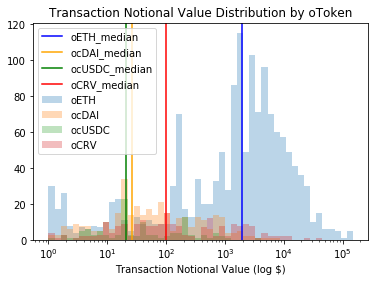

In [14]:
plt.hist(oETH, **kwargs, label = 'oETH')
plt.hist(ocDAI, **kwargs, label = 'ocDAI')
plt.hist(ocUSDC, **kwargs, label = 'ocUSDC')
plt.hist(oCRV, **kwargs, label = 'oCRV')
plt.axvline(oETH.median(), label = 'oETH_median', color = 'blue')
plt.axvline(ocDAI.median(), label = 'ocDAI_median', color = 'orange')
plt.axvline(ocUSDC.median(), label = 'ocUSDC_median', color = 'green')
plt.axvline(oCRV.median(), label = 'oCRV_median', color = 'red')
plt.xscale('log')
plt.legend()
plt.title('Transaction Notional Value Distribution by oToken')
plt.xlabel('Transaction Notional Value (log $)');

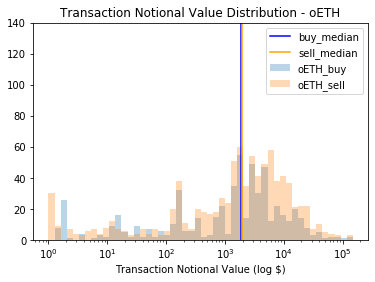

In [15]:
plt.hist(oETH_buy, **kwargs, label = 'oETH_buy')
plt.hist(oETH_sell, **kwargs, label = 'oETH_sell')
plt.axvline(oETH_buy.median(), label = 'buy_median', color = 'blue')
plt.axvline(oETH_sell.median(), label = 'sell_median', color = 'orange')
plt.xscale('log')
plt.legend()
plt.ylim(0, 140)
plt.title('Transaction Notional Value Distribution - oETH')
plt.xlabel('Transaction Notional Value (log $)');

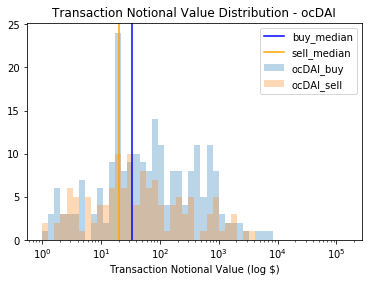

In [16]:
plt.hist(ocDAI_buy, **kwargs, label = 'ocDAI_buy')
plt.hist(ocDAI_sell, **kwargs, label = 'ocDAI_sell')
plt.axvline(ocDAI_buy.median(), label = 'buy_median', color = 'blue')
plt.axvline(ocDAI_sell.median(), label = 'sell_median', color = 'orange')
plt.xscale('log')
plt.legend()
plt.title('Transaction Notional Value Distribution - ocDAI')
plt.xlabel('Transaction Notional Value (log $)');

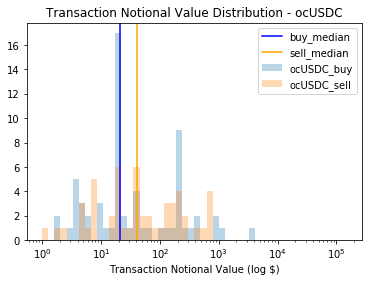

In [17]:
plt.hist(ocUSDC_buy, **kwargs, label = 'ocUSDC_buy')
plt.hist(ocUSDC_sell, **kwargs, label = 'ocUSDC_sell')
plt.axvline(ocUSDC_buy.median(), label = 'buy_median', color = 'blue')
plt.axvline(ocUSDC_sell.median(), label = 'sell_median', color = 'orange')
plt.xscale('log')
plt.legend()
plt.title('Transaction Notional Value Distribution - ocUSDC')
plt.xlabel('Transaction Notional Value (log $)');

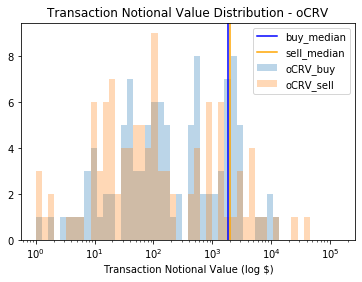

In [18]:
plt.hist(oCRV_buy, **kwargs, label = 'oCRV_buy')
plt.hist(oCRV_sell, **kwargs, label = 'oCRV_sell')
plt.axvline(oETH_buy.median(), label = 'buy_median', color = 'blue')
plt.axvline(oETH_sell.median(), label = 'sell_median', color = 'orange')
plt.xscale('log')
plt.legend()
plt.title('Transaction Notional Value Distribution - oCRV')
plt.xlabel('Transaction Notional Value (log $)');

### Account Clusters

In [19]:
len(txdf.groupby('account'))

164

In [20]:
txdf.head()

,value,account,side,token
0,0.00,5778f2824a114f6115dc74d432685d3336216017,buy,ocDAI
1,0.00,1460771b713e8e58e350f9d82f7b83acb6b2e75f,buy,ocDAI
2,0.02,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,ocUSDC
3,1.59,263fc4d9eb6da1ed296ea6d189b41e546a188d8a,buy,ocDAI
4,16.31,5b0d9e4099bf629387a842ed6bff4dab70573f31,buy,ocDAI


In [21]:
txdf2 = (txdf[txdf.account != '39246c4f3f6592c974ebc44f80ba6dc69b817c71'] )
             # that contract is messing up account-based analsysis, so need to remove it
         
s = txdf2.token
txdf2['token_group'] = s.where(s == 'oETH', 'stablecoin')

txdf2 = (txdf2.groupby(['account', 'side', 'token_group']).agg(sum)
         .unstack(level=1).unstack(level=1)
         .fillna(0)
        )
txdf2.head()

<ipython-input-21-cfb3af755f71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txdf2['token_group'] = s.where(s == 'oETH', 'stablecoin')


value           
side                                            buy       sell
token_group                              stablecoin stablecoin
account                                                       
00000000b1786c9698c160d78232c78d6f6474fe      83.57       0.00
0006e4548aed4502ec8c844567840ce6ef1013f5    1086.73       0.00
004afb002e3fb33c833fc16b6b63103bbf97312d       0.00    1738.19
01da73c4ec1355f953ad0aaca3ef20e342aea92a       0.00   12143.93
0281cb81079165ad8ba2e4ec6092ae4f42464e6d       0.00    1417.80

In [22]:
len(txdf[txdf.account == '39246c4f3f6592c974ebc44f80ba6dc69b817c71'])/len(txdf.account)

0.39842381786339753

In [23]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

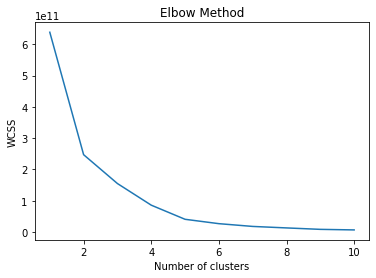

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(txdf2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [25]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(txdf2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
labels = kmeans.predict(txdf2)

counts = np.bincount(labels)
props = counts/len(labels)

txdf2['cluster'] = labels
clusters = (txdf2.groupby('cluster')
            .agg('mean').astype('int').round(0)
            .assign(proportion = props.round(2), count = counts)
            .sort_values(by=['proportion'], ascending = False)
           )
clusters

value            proportion count
side               buy       sell                 
token_group stablecoin stablecoin                 
cluster                                           
0                 1472       2375       0.87   141
5                52249      31763       0.06     9
4                 3046      85577       0.04     6
2               180533      24557       0.03     5
1               506332        603       0.01     1
3               274387     291187       0.01     1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12237cc70>]],
      dtype=object)

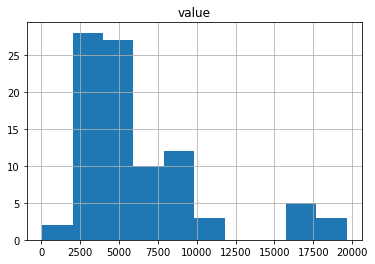

In [27]:
acct = txdf2[txdf2.cluster == 3].reset_index().account[0]
txdf0[txdf0.account == acct].sort_values(by='value', ascending = False).hist()

In [28]:
acct2 = txdf2[txdf2.cluster == 1].reset_index().account[0]
a = txdf0[txdf0.account == acct2]
a

,tx,minute,value,account,side,type,token
9,6958e6c5b4234ac6b6ccf7b115d7288c76f9d86a645618...,02/12/20 16:27,0.01,97dec872013f6b5fb443861090ad931542878126,buy,put,ocDAI
39,29c11f3571871c2360237deabf16229cc1576abe643f3a...,02/15/20 19:57,9.93,97dec872013f6b5fb443861090ad931542878126,buy,put,ocUSDC
349,88077a94f01bcbe99773edfbd7894f72118e36772486e9...,03/04/20 5:17,4.63,97dec872013f6b5fb443861090ad931542878126,buy,put,ocDAI
359,528bb500fd573085658982049f783a025b664c4db37662...,03/04/20 14:34,113.11,97dec872013f6b5fb443861090ad931542878126,buy,put,ocDAI
361,9acb8df8a9f6d8884191e1cd6e198b8f9310db3fc7b5d4...,03/04/20 16:08,156.00,97dec872013f6b5fb443861090ad931542878126,buy,put,ocUSDC
...,...,...,...,...,...,...,...
2107,60fc054eae44ee6d7de7a770a5817a67acbc5104851957...,04/23/20 16:48,39.41,97dec872013f6b5fb443861090ad931542878126,buy,put,oETH_100_042420
2171,df56f610f40508640457af604bac2690f4a8405a6cb062...,04/24/20 12:45,9367.80,97dec872013f6b5fb443861090ad931542878126,buy,put,oETH_150_052920
2180,c17dd24037635ace8030f99914d3d5652b85fca93d3452...,04/24/20 16:09,12327.27,97dec872013f6b5fb443861090ad931542878126,buy,put,oETH_160_050120
2238,417d900f7285c57bbca83f970b705c9b0249f02df06510...,04/25/20 21:24,3673.54,97dec872013f6b5fb443861090ad931542878126,buy,put,oETH_150_052920


In [30]:
a.tx[2180]

'c17dd24037635ace8030f99914d3d5652b85fca93d345256de2bfddcdbd8ce9d'

In [31]:
acct3 = txdf2[txdf2.cluster == 2].reset_index().account
acct3

0    0c31b6605686aa26df47eb45af0e4aa6639a5fd6
1    1bcfe4f499db23909a5ddc33d6e2d879531176ec
2    28595f15c04cf1f4ce978fc77a210dbc30e025bb
3    505846a0a89dd26fa5cd0677fd5406039c218620
4    f623c8bc4c9b6279ebec8777354052cb028304b1
Name: account, dtype: object

In [32]:
acct3 = txdf2[txdf2.cluster == 2].reset_index().account[1]
txdf0[txdf0.account == acct3].tx[2361]

'22132a2347b5fa73ca578a085a840bd4ac0235e2c0c9418649656d97f6b81de1'

In [33]:
txdf2.columns

MultiIndex([(  'value',  'buy', 'stablecoin'),
            (  'value', 'sell', 'stablecoin'),
            ('cluster',     '',           '')],
           names=[None, 'side', 'token_group'])

In [34]:
txdf3 = txdf2
txdf3['oETH'] = txdf2['value','buy', 'oETH'] + txdf2['value','sell', 'oETH']
txdf3['stablecoin'] = txdf2['value', 'buy', 'stablecoin'] + txdf2['value','sell', 'stablecoin']
txdf3 = txdf3.drop(columns = ['value', 'cluster'])

KeyError: ('value', 'buy', 'oETH')

In [35]:
txdf3.head()

value            cluster
side                                            buy       sell        
token_group                              stablecoin stablecoin        
account                                                               
00000000b1786c9698c160d78232c78d6f6474fe      83.57       0.00       0
0006e4548aed4502ec8c844567840ce6ef1013f5    1086.73       0.00       0
004afb002e3fb33c833fc16b6b63103bbf97312d       0.00    1738.19       0
01da73c4ec1355f953ad0aaca3ef20e342aea92a       0.00   12143.93       0
0281cb81079165ad8ba2e4ec6092ae4f42464e6d       0.00    1417.80       0

Text(0, 0.5, 'WCSS')

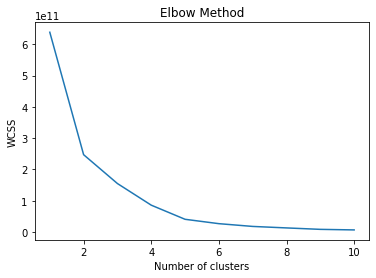

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(txdf3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [37]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(txdf3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [38]:
labels = kmeans.predict(txdf3)

counts = np.bincount(labels)
props = counts/len(labels)

txdf3['cluster'] = labels
clusters = (txdf3.groupby('cluster')
            .agg('mean').astype('int').round(0)
            .assign(proportion = props.round(2), count = counts)
            .sort_values(by=['proportion'], ascending = False)
           )
clusters

value            proportion count
side               buy       sell                 
token_group stablecoin stablecoin                 
cluster                                           
0                 3248       7095       0.94   154
2               156921      23467       0.04     7
1               506332        603       0.01     1
3               274387     291187       0.01     1

In [39]:
x = txdf3['oETH']
y = txdf3['stablecoin']
colormap = np.array(['r', 'g', 'b', 'k'])

plt.scatter(x, y, c = colormap[txdf3.cluster], alpha = 0.75)
plt.xlabel('oETH Transaction Notional Value')
plt.ylabel('Stablecoin Transaction Notional Value')
plt.title('Transacting Address Clusters - oETH vs. stablecoin')
;

KeyError: 'oETH'

In [40]:
txdf4 = txdf2
txdf4['buy'] = txdf2['value','buy', 'oETH'] + txdf2['value','buy', 'stablecoin']
txdf4['sell'] = txdf2['value', 'sell', 'oETH'] + txdf2['value','sell', 'stablecoin']
txdf4 = txdf4.drop(columns = ['value', 'cluster', 'oETH', 'stablecoin'])
txdf4['both'] = np.where((txdf4.buy > 0) & (txdf4.sell > 0), 1, 0)
sum(txdf4.both) / len(txdf4.both)

KeyError: ('value', 'buy', 'oETH')

Text(0, 0.5, 'WCSS')

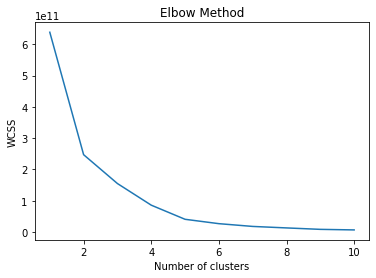

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(txdf4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [42]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(txdf4)
labels = kmeans.predict(txdf4)

counts = np.bincount(labels)
props = counts/len(labels)

txdf4['cluster'] = labels
clusters = (txdf4.groupby('cluster')
            .agg('mean').astype('int').round(0)
            .assign(proportion = props.round(2), count = counts)
            .sort_values(by=['proportion'], ascending = False)
           )
clusters

value            proportion count
side               buy       sell                 
token_group stablecoin stablecoin                 
cluster                                           
0                 1803       1659       0.85   139
3                16643      57470       0.09    15
1               156921      23467       0.04     7
2               506332        603       0.01     1
4               274387     291187       0.01     1

In [43]:
colormap = np.array(['r', 'g', 'b', 'k', 'm'])

plt.scatter(txdf4.buy, txdf4.sell, c = colormap[txdf4.cluster], alpha = 0.75)
plt.xlabel('oETH Transaction Notional Value')
plt.ylabel('Stablecoin Transaction Notional Value')
plt.title('Transacting Address Clusters - Buy vs. Sell')
;

AttributeError: 'DataFrame' object has no attribute 'buy'

# Opyn Vault Analysis

In [44]:
vdf0 = pd.read_csv('Opyn-Vaults.csv')
vdf0.shape

(275, 10)

In [45]:
vdf = vdf0[vdf0['expired'] == 0]
vdf = vdf[vdf['address'] != '0x076c…11e4']

vdf = (vdf[vdf['oToken'] != 'ETH Call $250 05/29/20']
      .drop(columns = ['ratio', 'collateral', 'issued', 'collateral_token', 'expired'])
      .replace(r'ETH.+', 'oETH', regex = True)
      )
vdf.shape

(187, 5)

In [46]:
vdf.head()

,address,collateral_value_current,notional_value,oToken,oToken_group
0,0x33f7…c452,53.500000,29.302073,ocDAI,stablecoin
1,0xec32…b7f2,2420.710434,1198.057083,ocDAI,stablecoin
2,0x47db…c958,0.379208,0.164235,ocDAI,stablecoin
3,0x3136…0f69,0.537568,0.223493,ocDAI,stablecoin
4,0xd89b…25f3,21.400000,8.524278,ocDAI,stablecoin


### Collateral Value

''

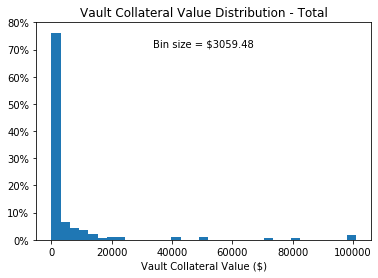

In [47]:
collat = vdf.collateral_value_current

hist, bins, _ = plt.hist(collat, bins=33, density = False, weights=np.ones(len(collat)) / len(collat))
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylim(0,.8)
plt.title('Vault Collateral Value Distribution - Total')
plt.xlabel('Vault Collateral Value ($)')
plt.text(.5, .9, 'Bin size = ${}'.format(round(bins[1], 2)), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
; 

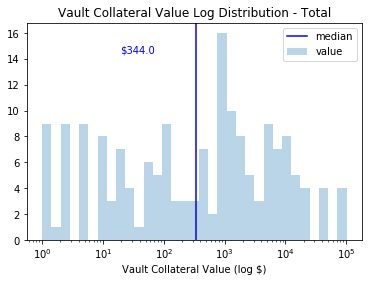

In [48]:
kwargs = dict(histtype='bar', alpha=.3, bins=np.logspace(np.log10(bins[0]+1),np.log10(bins[-1]),len(bins)))

plt.axvline(collat.median(), label = 'median', color = 'blue')
plt.hist(collat, **kwargs, label = 'value')
plt.text(.25, .9, '$'+str(round(collat.median(),2)), horizontalalignment='center', 
         verticalalignment='center', transform=ax.transAxes, color = 'blue')
plt.xscale('log')
plt.legend()
plt.title('Vault Collateral Value Log Distribution - Total')
plt.xlabel('Vault Collateral Value (log $)');

In [49]:
# Collateral Value
ocDAI_collat = vdf[vdf.oToken == 'ocDAI'].collateral_value_current
ocUSDC_collat = vdf[vdf.oToken == 'ocUSDC'].collateral_value_current
oETH_collat = vdf[vdf.oToken == 'oETH'].collateral_value_current

stable_collat = vdf[vdf.oToken_group == 'stablecoin'].collateral_value_current

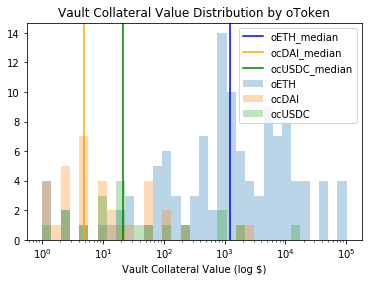

In [50]:
plt.hist(oETH_collat, **kwargs, label = 'oETH')
plt.hist(ocDAI_collat, **kwargs, label = 'ocDAI')
plt.hist(ocUSDC_collat, **kwargs, label = 'ocUSDC')
plt.axvline(oETH_collat.median(), label = 'oETH_median', color = 'blue')
plt.axvline(ocDAI_collat.median(), label = 'ocDAI_median', color = 'orange')
plt.axvline(ocUSDC_collat.median(), label = 'ocUSDC_median', color = 'green')
plt.xscale('log')
plt.legend()
plt.title('Vault Collateral Value Distribution by oToken')
plt.xlabel('Vault Collateral Value (log $)');

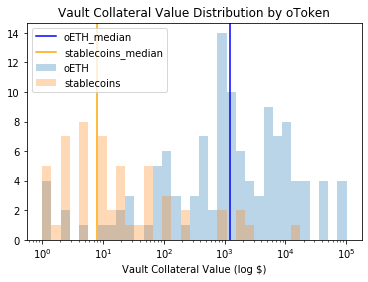

In [51]:
plt.hist(oETH_collat, **kwargs, label = 'oETH')
plt.hist(stable_collat, **kwargs, label = 'stablecoins')
plt.axvline(oETH_collat.median(), label = 'oETH_median', color = 'blue')
plt.axvline(stable_collat.median(), label = 'stablecoins_median', color = 'orange')
plt.xscale('log')
plt.legend()
plt.title('Vault Collateral Value Distribution by oToken')
plt.xlabel('Vault Collateral Value (log $)');

### Notional Value

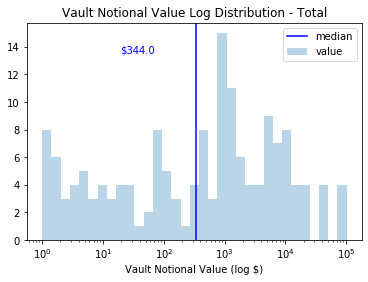

In [52]:
nv = vdf.notional_value

plt.axvline(nv.median(), label = 'median', color = 'blue')
plt.hist(nv, **kwargs, label = 'value')
plt.text(.25, .9, '$'+str(round(nv.median(),2)), horizontalalignment='center', 
         verticalalignment='center', transform=ax.transAxes, color = 'blue')
plt.xscale('log')
plt.legend()
plt.title('Vault Notional Value Log Distribution - Total')
plt.xlabel('Vault Notional Value (log $)');

In [53]:
# Notional Value

ocDAI_nv = vdf[vdf.oToken == 'ocDAI'].notional_value
ocUSDC_nv = vdf[vdf.oToken == 'ocUSDC'].notional_value
oETH_nv = vdf[vdf.oToken == 'oETH'].notional_value

stable_nv = vdf[vdf.oToken_group == 'stablecoin'].notional_value

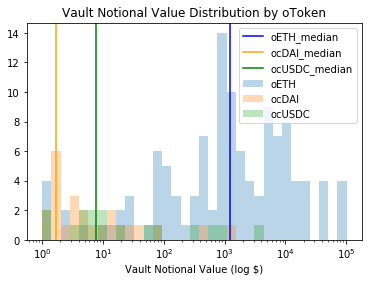

In [54]:
plt.hist(oETH_nv, **kwargs, label = 'oETH')
plt.hist(ocDAI_nv, **kwargs, label = 'ocDAI')
plt.hist(ocUSDC_nv, **kwargs, label = 'ocUSDC')
plt.axvline(oETH_nv.median(), label = 'oETH_median', color = 'blue')
plt.axvline(ocDAI_nv.median(), label = 'ocDAI_median', color = 'orange')
plt.axvline(ocUSDC_nv.median(), label = 'ocUSDC_median', color = 'green')
plt.xscale('log')
plt.legend()
plt.title('Vault Notional Value Distribution by oToken')
plt.xlabel('Vault Notional Value (log $)');

### Address Vault Collateral Value Clusters

In [55]:
vdf2 = (vdf.drop(columns = ['notional_value', 'oToken'])
        .groupby(['address', 'oToken_group']).agg(sum)
         .unstack(level=1)
         .fillna(.0000000000001)
       )
vdf2.shape

(137, 2)

In [56]:
vdf2

collateral_value_current              
oToken_group                     oETH    stablecoin
address                                            
0x000a…5a8e              3.580000e+03  1.000000e-13
0x01bd…a0f2              5.000000e+04  1.000000e-13
0x0381…9ad4              1.291656e+02  1.000000e-13
0x0837…0f4f              1.000000e-13  1.096600e+01
0x0a33…efde              4.534986e+03  1.000000e-13
...                               ...           ...
0xf4d9…8c72              1.000000e-13  2.546600e-01
0xf665…5796              1.000000e-13  1.605000e+01
0xfb33…22fe              1.000000e-13  2.140000e-02
0xff07…5e51              1.500000e+05  1.000000e-13
0xffac…1bb5              1.000000e-13  1.070000e+01

[137 rows x 2 columns]

Text(0, 0.5, 'WCSS')

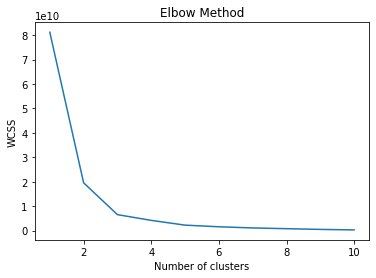

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(vdf2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(vdf2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [59]:
labels = kmeans.predict(vdf2)

counts = np.bincount(labels)
props = counts/len(labels)

vdf2['cluster'] = labels
clusters = (vdf2.groupby('cluster')
            .agg('mean').astype('int').round(0)
            .assign(proportion = props.round(2), count = counts)
            .sort_values(by=['proportion'], ascending = False)
           )
clusters

collateral_value_current            proportion count
oToken_group                     oETH stablecoin                 
cluster                                                          
1                                2225        194       0.94   129
0                               66888          0       0.04     6
2                              165481          0       0.01     2

''

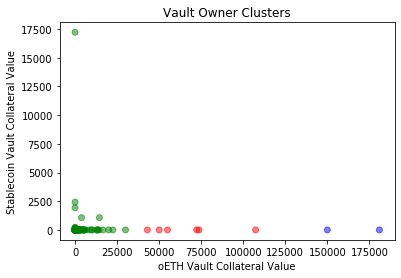

In [60]:
x = vdf2['collateral_value_current','oETH']
y = vdf2['collateral_value_current','stablecoin']
colormap = np.array(['r', 'g', 'b'])

plt.scatter(x, y, c = colormap[vdf2.cluster], alpha = 0.5)
plt.xlabel('oETH Vault Collateral Value')
plt.ylabel('Stablecoin Vault Collateral Value')
plt.title('Vault Owner Clusters')

# ax = plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.ylim(1, max(y) + 1000)
# plt.xlim(1, 200000)
;

In [61]:
vdf2[vdf2.cluster == 2]

collateral_value_current               cluster
oToken_group                     oETH    stablecoin        
address                                                    
0xec43…1215                  180963.0  1.000000e-13       2
0xff07…5e51                  150000.0  1.000000e-13       2

In [62]:
txdf[txdf['account'] == '076c95c6cd2eb823acc6347fdf5b3dd9b83511e4']

,value,account,side,token


In [63]:
vdf0[vdf0.address == '0xff07…5e51']

,address,collateral,collateral_token,collateral_value_current,issued,notional_value,ratio,oToken,oToken_group,expired
118,0xff07…5e51,50000.0,USDC,50000.0,250.0,50000.0,1,ETH Put $200 05/15/20,oETH,0
131,0xff07…5e51,100000.0,USDC,100000.0,500.0,100000.0,1,ETH Put $200 05/08/20,oETH,0


In [64]:
vdf0[vdf0.address == '0xec43…1215']

,address,collateral,collateral_token,collateral_value_current,issued,notional_value,ratio,oToken,oToken_group,expired
129,0xec43…1215,100963.0,USDC,100963.0,504.815,100963.0,1,ETH Put $200 05/08/20,oETH,0
173,0xec43…1215,80000.0,USDC,80000.0,500.000,80000.0,1,ETH Put $160 05/08/20,oETH,0


In [65]:
vdf3 = vdf2.drop(columns = ['cluster'])
vdf3.head()

collateral_value_current              
oToken_group                     oETH    stablecoin
address                                            
0x000a…5a8e              3.580000e+03  1.000000e-13
0x01bd…a0f2              5.000000e+04  1.000000e-13
0x0381…9ad4              1.291656e+02  1.000000e-13
0x0837…0f4f              1.000000e-13  1.096600e+01
0x0a33…efde              4.534986e+03  1.000000e-13

In [66]:
vdf3['both'] = np.where((vdf3['collateral_value_current','oETH'] > .0001) 
                        & (vdf3['collateral_value_current', 'stablecoin'] > .0001), 1, 0)

In [67]:
sum(vdf3.both) / len(vdf3.both)

0.058394160583941604

In [68]:
vdf3[vdf3.both == 1]

collateral_value_current              both
oToken_group                     oETH   stablecoin     
address                                                
0x3111…faca                 22.410000     21.40000    1
0x33f7…c452                137.980802     53.50000    1
0x62e1…5208                905.000000     26.75000    1
0x6cfa…0f04              14500.000000   1070.00000    1
0x75b3…b236                 31.000000      2.16140    1
0x9e68…7d84                  2.000000  17214.32692    1
0xa6e3…54f3               3857.441434   1070.00000    1
0xe3b1…f646                100.000000    214.00000    1